<a href="https://colab.research.google.com/github/ShefaliDhingra/Learning_Recommendation_System/blob/main/Project%201/agsd0143_LRS_ERD_REPORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Recommendation System

**Contributors:** Aayush Garg (055001) , Shefali Dhingra (055043)

## Introduction

**Project Overview**

The Learning Recommendation System (LRS) is designed to enhance the online learning experience by personalizing course recommendations based on user preferences, reviews, completion records, and course outlines. Using a relational database structure in MySQL, the system ensures efficient data storage, retrieval, and management, optimizing course discovery and user engagement.

**Purpose of the Report**

This report provides a comprehensive analysis of the Learning Recommendation System, detailing its objectives, structure, relationships, and managerial implications. It serves as a reference for database administrators, online education platforms, and IT professionals to understand the system's design and functionality.

## Objectives

The primary objectives of the Learning Recommendation System are:

* To centralize learning data and streamline course recommendation processes.
* To improve the learning experience through efficient record-keeping and quick retrieval of relevant courses.
* To facilitate seamless recommendations based on user preferences, past courses, and completion records.
* To enhance user engagement through personalized course suggestions.
* To ensure secure access control, protecting user data and maintaining privacy.
* To incorporate real-time analytics and reporting to provide administrators with actionable insights.


## Database Description

The Learning Recommendation System database consists of 8 relational tables, each serving a specific function. The structure follows normalization principles to reduce redundancy and maintain data consistency.


**ERD Diagram using the crowfeet annotations**

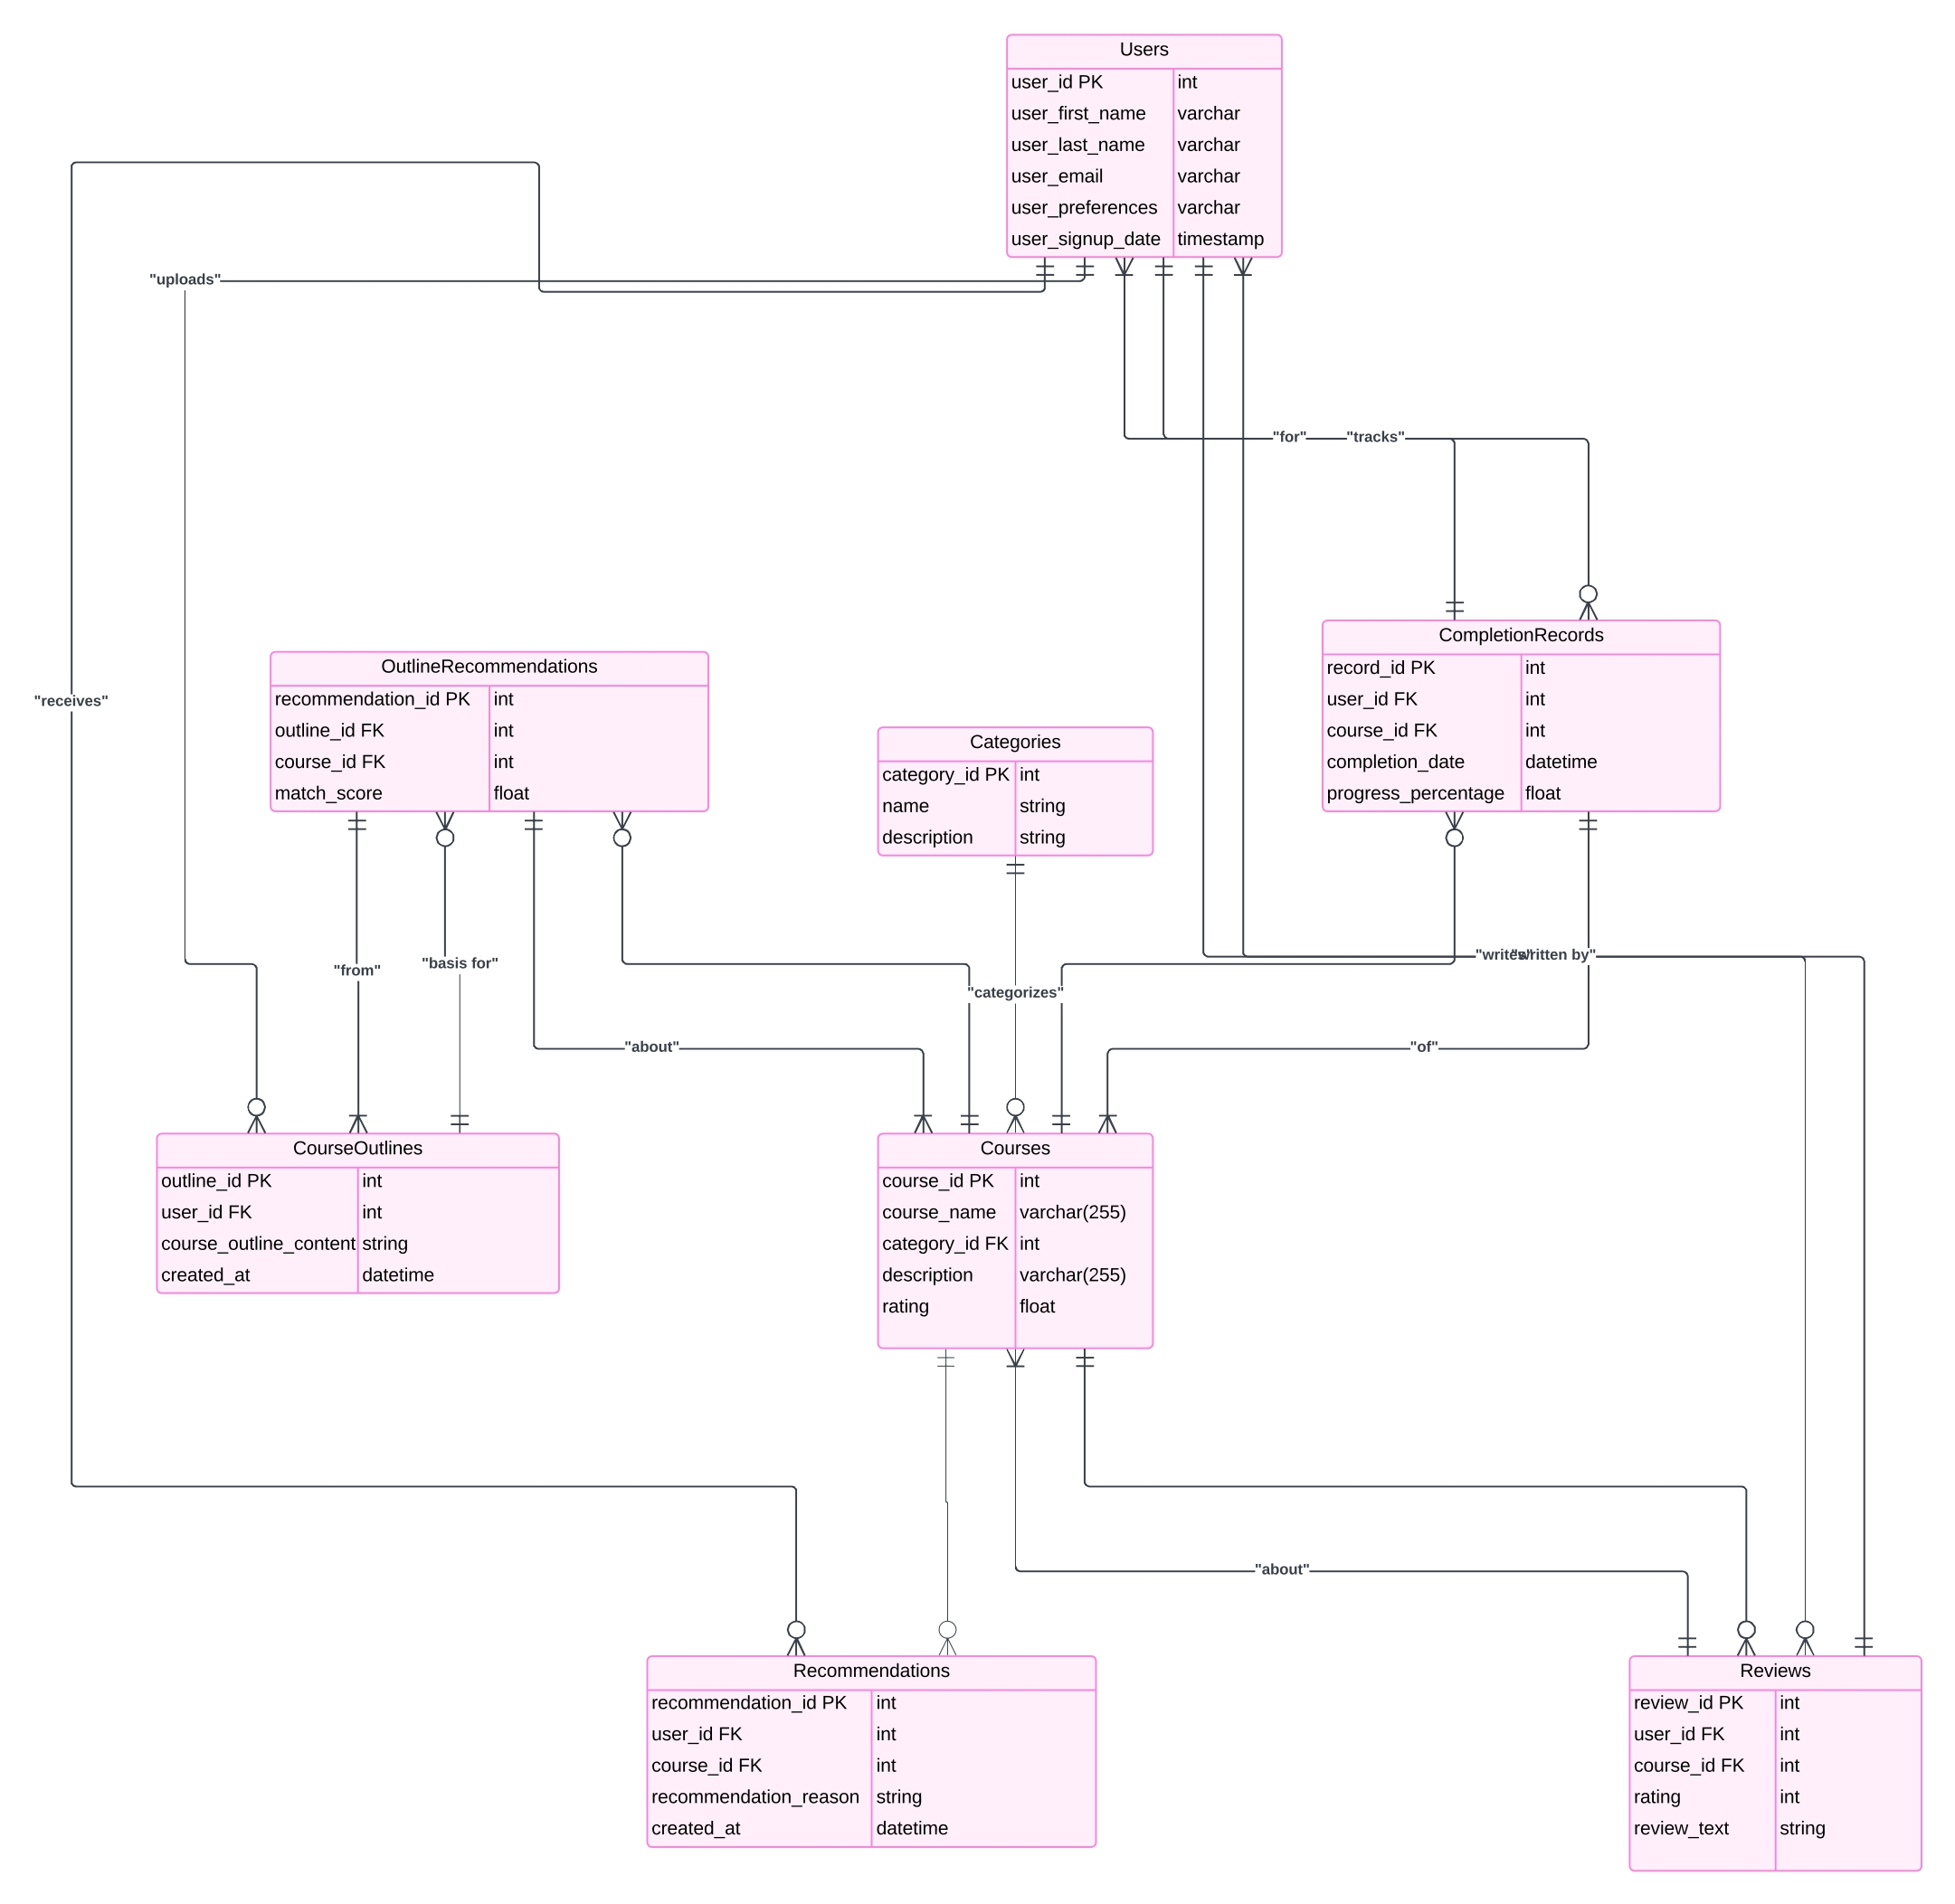

## Detailed Features of the Tables

### Key Features
- **User Management**: Stores user details, including name, email, preferences, and sign-up date.
- **Course and Category Management**: Organizes courses under specific categories to facilitate structured learning.
- **Reviews and Ratings**: Users can review and rate courses to help other learners make informed decisions.
- **Completion Records**: Tracks user progress and course completion status.
- **Course Outlines**: Stores learning materials uploaded by users.
- **Recommendation System**: Provides personalized course recommendations based on past interactions and preferences.
- **Outline-Based Recommendations**: Suggests courses based on user-uploaded outlines.
- **Security and Scalability**: Implements role-based access control (RBAC) and supports future system expansions.

---

### Table Descriptions & Attributes

#### 1. Users (`sd_USERS`)
- **Stores**: Personal details and preferences of users.
- **Primary Key**: `sd_user_id` (INT, PRIMARY KEY)
- **Attributes**: `first_name`, `last_name`, `email` (unique), `preferences`, `sign_up_date`.

#### 2. Categories (`sd_CATEGORIES`)
- **Stores**: Course categories for classification.
- **Primary Key**: `sd_category_id` (INT, PRIMARY KEY)
- **Attributes**: `category_name` (unique), `description`.

#### 3. Courses (`sd_COURSES`)
- **Stores**: Details of courses available for recommendation.
- **Primary Key**: `sd_course_id` (INT, PRIMARY KEY)
- **Attributes**: `course_name`, `category_id` (FOREIGN KEY), `rating`, `description`.

#### 4. Reviews (`sd_REVIEWS`)
- **Stores**: User reviews and ratings for courses.
- **Primary Key**: `sd_review_id` (INT, PRIMARY KEY)
- **Attributes**: `user_id` (FOREIGN KEY), `course_id` (FOREIGN KEY), `rating` (1-5), `review_text`.

#### 5. Completion Records (`sd_COMPLETION_RECORDS`)
- **Tracks**: User progress and course completion.
- **Primary Key**: `sd_record_id` (INT, PRIMARY KEY)
- **Attributes**: `user_id` (FOREIGN KEY), `course_id` (FOREIGN KEY), `completion_date`, `progress_percentage`.

#### 6. Course Outlines (`sd_COURSE_OUTLINES`)
- **Stores**: Outlines uploaded by users for learning references.
- **Primary Key**: `sd_outline_id` (INT, PRIMARY KEY)
- **Attributes**: `user_id` (FOREIGN KEY), `outline_content`, `creation_date`.

#### 7. Recommendations (`sd_RECOMMENDATIONS`)
- **Stores**: Personalized course recommendations.
- **Primary Key**: `sd_recommendation_id` (INT, PRIMARY KEY)
- **Attributes**: `user_id` (FOREIGN KEY), `course_id` (FOREIGN KEY), `recommendation_logic`.

#### 8. Outline Recommendations (`sd_OUTLINE_RECOMMENDATIONS`)
- **Suggests**: Courses based on user-uploaded outlines.
- **Primary Key**: `sd_recommendation_id` (INT, PRIMARY KEY)
- **Attributes**: `outline_id` (FOREIGN KEY), `course_id` (FOREIGN KEY), `match_score`.


### Table Detailed Descriptions & Attributes

#### 1. Users (`sd_USERS`)
- **Primary Key**: `sd_user_id` (INT, PRIMARY KEY)
- **Attributes**:
  - `sd_USER_first_name` (VARCHAR(50), NOT NULL) – Stores the first name of the user.
  - `sd_USER_last_name` (VARCHAR(50), NULL) – Stores the last name (optional).
  - `sd_USER_email` (VARCHAR(60), UNIQUE, NOT NULL) – Stores a unique email ID.
  - `sd_USER_preferences` (VARCHAR(100), NULL) – Stores user preferences.
  - `sd_USER_signup_date` (DATE, NULL) – Stores the signup date.
- **Description**: Stores information about users of the platform.
- **Relationships**: One-to-many with `sd_COURSE_OUTLINES`, `sd_COMPLETION_RECORDS`, `sd_REVIEWS`, and `sd_RECOMMENDATIONS`.

#### 2. Categories (`sd_CATEGORIES`)
- **Primary Key**: `sd_CATEGORY_ID` (INT, PRIMARY KEY)
- **Attributes**:
  - `sd_CATEGORY_name` (VARCHAR(50), UNIQUE, NOT NULL) – Stores the category name.
  - `sd_CATEGORY_DESCRIPTION` (TEXT, NULL) – Stores a detailed category description.
- **Description**: Represents course categories for classification purposes.
- **Relationships**: One-to-many with `sd_COURSES`.

#### 3. Courses (`sd_COURSES`)
- **Primary Key**: `sd_COURSE_ID` (INT, PRIMARY KEY)
- **Attributes**:
  - `sd_COURSE_NAME` (VARCHAR(255), NOT NULL) – Stores the course name.
  - `sd_CATEGORY_ID` (INT, NULL, FOREIGN KEY → `sd_CATEGORIES(sd_CATEGORY_ID)`) – Links courses to categories.
  - `sd_COURSE_RATING` (DECIMAL(3,2), CHECK BETWEEN 0 AND 5, NULL) – Stores course rating between 0 and 5.
- **Description**: Stores details of courses available for recommendation.
- **Relationships**: Many-to-one with Categories. One-to-many with `sd_COMPLETION_RECORDS`, `sd_REVIEWS`, `sd_RECOMMENDATIONS`, and `sd_OUTLINE_RECOMMENDATIONS`.

#### 4. Reviews (`sd_REVIEWS`)
- **Primary Key**: `sd_REVIEW_ID` (INT, PRIMARY KEY)
- **Attributes**:
  - `sd_USER_ID` (INT, NOT NULL, FOREIGN KEY → `sd_USERS(sd_user_id)` ON DELETE CASCADE) – Links review to a user.
  - `sd_COURSE_ID` (INT, NOT NULL, FOREIGN KEY → `sd_COURSES(sd_COURSE_ID)` ON DELETE CASCADE) – Links review to a course.
  - `sd_REVIEW_RATING` (INT, CHECK BETWEEN 1 AND 5, NOT NULL) – Stores rating between 1 and 5.
  - `sd_REVIEW` (TEXT, NULL) – Stores the review text.
- **Description**: Stores user reviews and ratings for courses.
- **Relationships**: Many-to-one with `sd_USERS`. Many-to-one with `sd_COURSES`.

#### 5. Completion Records (`sd_COMPLETION_RECORDS`)
- **Primary Key**: `sd_RECORD_ID` (INT, PRIMARY KEY)
- **Attributes**:
  - `sd_USER_ID` (INT, NOT NULL, FOREIGN KEY → `sd_USERS(sd_user_id)` ON DELETE CASCADE) – Links to a user.
  - `sd_COURSE_ID` (INT, NOT NULL, FOREIGN KEY → `sd_COURSES(sd_COURSE_ID)` ON DELETE CASCADE) – Links to a course.
  - `sd_COMPLETION_DATE` (DATE, NULL) – Stores course completion date.
  - `sd_PROGRESS_PERCENTAGE` (DECIMAL(5,2), CHECK BETWEEN 0 AND 100, NULL) – Progress in percentage.
- **Description**: Tracks course progress or completion status for users.
- **Relationships**: Many-to-one with `sd_USERS`. Many-to-one with `sd_COURSES`.

#### 6. Course Outlines (`sd_COURSE_OUTLINES`)
- **Primary Key**: `sd_OUTLINE_ID` (INT, PRIMARY KEY)
- **Attributes**:
  - `sd_USER_ID` (INT, NOT NULL, FOREIGN KEY → `sd_USERS(sd_user_id)` ON DELETE CASCADE) – Links outline to a user.
  - `sd_COURSE_OUTLINE_CONTENT` (TEXT, NOT NULL) – Stores outline content.
- **Description**: Stores course outlines uploaded by users.
- **Relationships**: Many-to-one with `sd_USERS`. One-to-many with `sd_OUTLINE_RECOMMENDATIONS`.

#### 7. Recommendations (`sd_RECOMMENDATIONS`)
- **Primary Key**: `sd_RECOMMENDATION_ID` (INT, PRIMARY KEY)
- **Attributes**:
  - `sd_USER_ID` (INT, NOT NULL, FOREIGN KEY → `sd_USERS(sd_user_id)` ON DELETE CASCADE) – Links recommendation to a user.
  - `sd_COURSE_ID` (INT, NOT NULL, FOREIGN KEY → `sd_COURSES(sd_COURSE_ID)` ON DELETE CASCADE) – Links recommendation to a course.
  - `sd_RECOMMENDATION_LOGIC` (TEXT, NOT NULL) – Stores recommendation logic.
- **Description**: Represents recommendations provided to users based on their preferences and history.
- **Relationships**: Many-to-one with `sd_USERS`. Many-to-one with `sd_COURSES`.

#### 8. Outline Recommendations (`sd_OUTLINE_RECOMMENDATIONS`)
- **Primary Key**: `sd_RECOMMENDATION_ID` (INT, PRIMARY KEY, AUTO_INCREMENT)
- **Attributes**:
  - `sd_OUTLINE_ID` (INT, NOT NULL, FOREIGN KEY → `sd_COURSE_OUTLINES(sd_OUTLINE_ID)` ON DELETE CASCADE) – Links recommendation to an outline.
  - `sd_COURSE_ID` (INT, NOT NULL, FOREIGN KEY → `sd_COURSES(sd_COURSE_ID)` ON DELETE CASCADE) – Links recommendation to a course.
  - `sd_MATCH_SCORE` (DECIMAL(5,2), CHECK BETWEEN 0 AND 100, NULL) – Stores matching score percentage.
- **Description**: Represents recommendations based on user-uploaded course outlines.
- **Relationships**: Many-to-one with `sd_COURSE_OUTLINES`. Many-to-one with `sd_COURSES`.


---
# Relationships in Detail

## Users → Reviews (1:M)
- A User can write multiple Reviews, but each Review belongs to only one User.
- **Foreign Key:** `sd_USER_ID` in `sd_REVIEWS` references `sd_USERS.sd_user_id`.

## Users → CompletionRecords (1:M)
- A User can complete multiple Courses, but each CompletionRecord belongs to only one User.
- **Foreign Key:** `sd_USER_ID` in `sd_COMPLETION_RECORDS` references `sd_USERS.sd_user_id`.

## Users → Recommendations (1:M)
- A User can receive multiple Course Recommendations, but each Recommendation is linked to only one User.
- **Foreign Key:** `sd_USER_ID` in `sd_RECOMMENDATIONS` references `sd_USERS.sd_user_id`.

## Courses → Reviews (1:M)
- A Course can have multiple Reviews, but each Review is linked to only one Course.
- **Foreign Key:** `sd_COURSE_ID` in `sd_REVIEWS` references `sd_COURSES.sd_COURSE_ID`.

## Courses → CompletionRecords (1:M)
- A Course can be completed by multiple Users, but each CompletionRecord is linked to only one Course.
- **Foreign Key:** `sd_COURSE_ID` in `sd_COMPLETION_RECORDS` references `sd_COURSES.sd_COURSE_ID`.

## Courses → Recommendations (1:M)
- A Course can be recommended to multiple Users, but each Recommendation is linked to only one Course.
- **Foreign Key:** `sd_COURSE_ID` in `sd_RECOMMENDATIONS` references `sd_COURSES.sd_COURSE_ID`.

## Categories → Courses (1:M)
- A Category can have multiple Courses, but each Course belongs to only one Category.
- **Foreign Key:** `sd_CATEGORY_ID` in `sd_COURSES` references `sd_CATEGORIES.sd_CATEGORY_ID`.

## Users → CourseOutlines (1:M)
- A User can create multiple Course Outlines, but each Outline is linked to only one User.
- **Foreign Key:** `sd_USER_ID` in `sd_COURSE_OUTLINES` references `sd_USERS.sd_user_id`.

## CourseOutlines → OutlineRecommendations (1:M)
- A Course Outline can have multiple Outline Recommendations, but each Recommendation is linked to only one Outline.
- **Foreign Key:** `sd_OUTLINE_ID` in `sd_OUTLINE_RECOMMENDATIONS` references `sd_COURSE_OUTLINES.sd_OUTLINE_ID`.

## Courses → OutlineRecommendations (1:M)
- A Course can be linked to multiple Outline Recommendations, but each Recommendation is tied to only one Course.
- **Foreign Key:** `sd_COURSE_ID` in `sd_OUTLINE_RECOMMENDATIONS` references `sd_COURSES.sd_COURSE_ID`.


# Relationships & Cardinality

The tables are interconnected through primary and foreign keys, ensuring data integrity and efficient management. Below are some critical relationships:

## Users → Reviews (1:M)
- A user can write multiple reviews, but each review belongs to one user.
- **Foreign Key:** `sd_USER_ID` in `sd_REVIEWS` references `sd_USERS.sd_user_id`.

## Users → Completion Records (1:M)
- A user can complete multiple courses, but each completion record belongs to one user.
- **Foreign Key:** `sd_USER_ID` in `sd_COMPLETION_RECORDS` references `sd_USERS.sd_user_id`.

## Users → Recommendations (1:M)
- A user can receive multiple recommendations, but each recommendation is linked to one user.
- **Foreign Key:** `sd_USER_ID` in `sd_RECOMMENDATIONS` references `sd_USERS.sd_user_id`.

## Courses → Reviews (1:M)
- A course can have multiple reviews, but each review is linked to one course.
- **Foreign Key:** `sd_COURSE_ID` in `sd_REVIEWS` references `sd_COURSES.sd_COURSE_ID`.

## Courses → Completion Records (1:M)
- A course can be completed by multiple users, but each completion record is linked to one course.
- **Foreign Key:** `sd_COURSE_ID` in `sd_COMPLETION_RECORDS` references `sd_COURSES.sd_COURSE_ID`.

## Courses → Recommendations (1:M)
- A course can be recommended to multiple users, but each recommendation is linked to one course.
- **Foreign Key:** `sd_COURSE_ID` in `sd_RECOMMENDATIONS` references `sd_COURSES.sd_COURSE_ID`.

## Categories → Courses (1:M)
- A category can have multiple courses, but each course belongs to only one category.
- **Foreign Key:** `sd_CATEGORY_ID` in `sd_COURSES` references `sd_CATEGORIES.sd_CATEGORY_ID`.

## Users → Course Outlines (1:M)
- A user can create multiple course outlines, but each outline is linked to one user.
- **Foreign Key:** `sd_USER_ID` in `sd_COURSE_OUTLINES` references `sd_USERS.sd_user_id`.

## Course Outlines → Outline Recommendations (1:M)
- A course outline can have multiple recommendations, but each recommendation is linked to one outline.
- **Foreign Key:** `sd_OUTLINE_ID` in `sd_OUTLINE_RECOMMENDATIONS` references `sd_COURSE_OUTLINES.sd_OUTLINE_ID`.

## Courses → Outline Recommendations (1:M)
- A course can be linked to multiple outline recommendations, but each recommendation is tied to one course.
- **Foreign Key:** `sd_COURSE_ID` in `sd_OUTLINE_RECOMMENDATIONS` references `sd_COURSES.sd_COURSE_ID`.

# Managerial Implications

A well-structured learning recommendation database provides significant advantages to platform administrators, educators, and learners:

## Impact on Platform Administration
- **Improved Efficiency:** Automated tracking of user activity, course preferences, and recommendations reduces manual work.
- **Better Course Organization:** Categorizing courses and tracking ratings ensures optimal course placement.
- **Compliance with Data Privacy Regulations:** Secure storage and access control maintain data integrity and confidentiality.
- **Seamless Integration:** The database can integrate with external learning platforms and analytics tools.

## Impact on Learners
- **Personalized Learning Experience:** Tailored course recommendations improve course discovery and engagement.
- **Optimized Course Selection:** Reviews and ratings help learners make informed decisions.
- **Progress Tracking:** Users can monitor their learning journey effectively.

## Impact on Educators and Course Creators
- **Better Course Visibility:** Highly-rated courses receive more recommendations, increasing enrollments.
- **Content Optimization:** Feedback through reviews helps in improving course quality.
- **Data-Driven Decision Making:** Insights from user preferences assist in designing better courses.

# Conclusion

The Learning Recommendation System is a scalable, secure, and efficient system designed to personalize online learning experiences. With real-time analytics, interoperability, and enhanced security, it ensures improved learning outcomes, optimized course discovery, and enhanced platform management.
